# Анализ оттока клиентов Метанпромбанка
[Презентация](https://disk.yandex.ru/i/3ttAV4bfX_n-5g)

## Описание проекта
### Задача
Проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка. Заказчик — менеджер из отдела маркетинга.
### Описание данных
Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.
Колонки:
- `USERID` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity` — количество баллов в собственности,
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта,
- `last_activity` — активный клиент,
- `EST_SALARY` — оценочный доход клиента,
- `churn` — признак оттока (клиент ещё не ушёл, но у него возникло такое желание).

### Способ сбора данных
Объединение информации из филиалов банка в разных городах, имеющих собственные базы данных.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1">Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Задача" data-toc-modified-id="Задача-1.1">Задача</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2">Описание данных</a></span></li><li><span><a href="#Способ-сбора-данных" data-toc-modified-id="Способ-сбора-данных-1.3">Способ сбора данных</a></span></li></ul></li><li><span><a href="#Загрузка-данных-и-библиотек" data-toc-modified-id="Загрузка-данных-и-библиотек-2">Загрузка данных и библиотек</a></span></li><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-3">Предобработка</a></span><ul class="toc-item"><li><span><a href="#Проверка-пропусков" data-toc-modified-id="Проверка-пропусков-3.1">Проверка пропусков</a></span></li><li><span><a href="#Кодирование-данных" data-toc-modified-id="Кодирование-данных-3.2">Кодирование данных</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-3.3">Изменение типов данных</a></span></li><li><span><a href="#Проверка-дубликатов" data-toc-modified-id="Проверка-дубликатов-3.4">Проверка дубликатов</a></span></li><li><span><a href="#Проверка-выбросов" data-toc-modified-id="Проверка-выбросов-3.5">Проверка выбросов</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-3.6">Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4">Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Распределения-признаков" data-toc-modified-id="Распределения-признаков-4.1">Распределения признаков</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-4.2">Корреляционный анализ</a></span></li></ul></li><li><span><a href="#Составление-и-проверка-гипотез" data-toc-modified-id="Составление-и-проверка-гипотез-5">Составление и проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-1" data-toc-modified-id="Гипотеза-1-5.1">Гипотеза 1</a></span></li><li><span><a href="#Гипотеза-2" data-toc-modified-id="Гипотеза-2-5.2">Гипотеза 2</a></span></li><li><span><a href="#Гипотеза-3" data-toc-modified-id="Гипотеза-3-5.3">Гипотеза 3</a></span></li></ul></li><li><span><a href="#Сегментация-отточных-клиентов" data-toc-modified-id="Сегментация-отточных-клиентов-6">Сегментация отточных клиентов</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7">Общий вывод</a></span></li><li><span><a href="#Рекомендации" data-toc-modified-id="Рекомендации-8">Рекомендации</a></span></li></ul></div>

## Загрузка данных и библиотек

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from pylab import rcParams
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
# загрузка таблицы
df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
# снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)

In [3]:
# отображаем важную информацию о датасете
display(df.head())
display(df.info())
display(df.describe().T)

# устанавливаем стиль графиков
sns.set_style('whitegrid')
sns.set_palette('coolwarm')

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

,count,mean,std,min,25%,50%,75%,max
USERID,10000.0,171814.712600,3.370824e+04,94561.0,142810.25,172728.000,201261.7500,2.291450e+05
score,10000.0,848.699400,6.544852e+01,642.0,802.00,853.000,900.0000,1.000000e+03
age,9974.0,42.734409,1.217997e+01,18.0,33.00,40.000,51.0000,8.600000e+01
equity,10000.0,2.627600,1.980836e+00,0.0,0.00,3.000,4.0000,9.000000e+00
balance,7705.0,827794.306510,1.980614e+06,0.0,295554.16,524272.200,980705.8500,1.191136e+08
products,10000.0,1.870100,7.926467e-01,0.0,1.00,2.000,2.0000,5.000000e+00
credit_card,10000.0,0.680400,4.663449e-01,0.0,0.00,1.000,1.0000,1.000000e+00
last_activity,10000.0,0.523500,4.994724e-01,0.0,0.00,1.000,1.0000,1.000000e+00
EST_SALARY,10000.0,147866.885544,1.393885e+05,2546.3,75251.90,119658.105,174500.5425,1.395064e+06
churn,10000.0,0.182000,3.858638e-01,0.0,0.00,0.000,0.0000,1.000000e+00


Файл с данными и все необходимые библиотеки были успешно загружены; отображена основная информация по таблице. Для дальнейшео анализа необходимо привести названия столбцов к naming convention, проверить пропуски, типы данных, выбросы и дубликаты.

## Предобработка

In [4]:
# переименование названий столбцов в таблице
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()
df.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

**Согласно логике данных, у каждого клиента должен числиться хотя бы 1 продукт банка. Проверим соблюдение логики данных.**

In [5]:
df[df['products']==0] # клиенты с отсутствием продуктов банка

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


Подозрительный клиент, возможно, уже покинул банк, но не удалился из системы. Исправим это.

In [6]:
df = df[df['products']!=0]

### Проверка пропусков

In [7]:
print('Проценты пропусков по столбцам')
round((df.isna().sum() / df.shape[0] * 100), 2)

Проценты пропусков по столбцам


userid            0.00
score             0.00
city              0.00
gender            0.00
age               0.26
equity            0.00
balance          22.94
products          0.00
credit_card       0.00
last_activity     0.00
est_salary        0.00
churn             0.00
dtype: float64

In [8]:
df[df['age'].isna()] # пропуски в столбце 'age'

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


Их не так много, они не связаны с конкретной характеристикой. Они относятся к типу MCAR. 

MCAR (Missing Completely At Random / Отсутствует совершенно случайно) — пропуски не зависят от переменных и не ведут к систематической ошибке (смещение, bias), но увеличивают случайную ошибку (разброс, variance), можно их отбрасывать или заполнять, т.к. заполнение не повлияет на характер связи между заполняемой переменной и остальными

Заполним их медианным значением.

In [9]:
df['age'] = df['age'].fillna(df['age'].median())

Теперь поищем закономерности пропусков в столбце с балансом.

In [10]:
df.groupby('churn')['balance'].apply(lambda x: x.isna().sum())

churn
0    2282
1      12
Name: balance, dtype: int64

In [11]:
df.groupby('credit_card')['balance'].apply(lambda x: x.isna().sum())

credit_card
0     422
1    1872
Name: balance, dtype: int64

In [12]:
df.groupby('products')['balance'].apply(lambda x: x.isna().sum())

products
1    1950
2     315
3      29
4       0
5       0
Name: balance, dtype: int64

In [13]:
df.groupby('last_activity')['balance'].apply(lambda x: x.isna().sum())

last_activity
0    1033
1    1261
Name: balance, dtype: int64

Пропущенные значения баланса преобладают у клиентов не изъявивших желание покинуть банк, имеющих кредитные карты, пользующихся меньшим числом продуктов банка. Сложно однозначно определить причину таких пропусков. 

Попробуем поработать с пропусками через кодирование данных.

### Кодирование данных

In [14]:
df['city_']=df['city']
df['gender_']=df['gender']
df = pd.get_dummies(df, columns = ['city_', 'gender_'])
df = df.rename(
    columns = ({
        'city__Ростов':'rostov', 'city__Рыбинск':'rybinsk','city__Ярославль':'yaroslavl', 
        'gender__Ж':'female', 'gender__М':'male'}))
df.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,female,male
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,1


In [15]:
df['balance_na'] = df['balance'].apply(lambda x: 1 if pd.isna(x) else 0)
df.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,female,male,balance_na
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,1,0,1
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,1,0


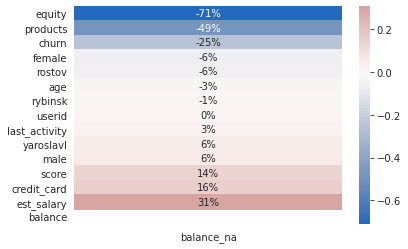

In [16]:
# посчитаем корреляцию 'balance_na' с остальными характеристиками
sns.heatmap(
    df.corr().loc[:,['balance_na']].drop(
        'balance_na').sort_values('balance_na'), annot=True,fmt='.0%', cmap='vlag', center=0)
plt.show()

Отрицательная корреляция наблюдается между отсутствием информации о балансе и баллами собственности. Возможно, это связано с обнулением баланса при покупке собственности. Также, видна связь отсутствия информации о балансе и числа банковских продуктов, которые тоже могут быть связаны с недвижимостью.

Логична положительная связь с оценочной заработной платой. Отсутствие баланса не связано с оттоком клиентов.

In [17]:
df_isnull = df.query('balance_na == 1')
df_notnull = df.query('balance_na == 0')
print('Статистика данных с пропусками в балансе')
display(df_isnull.describe())
print('Статистика данных без пропусков в балансе')
df_notnull.describe()

Статистика данных с пропусками в балансе


,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,female,male,balance_na
count,2294.000000,2294.000000,2294.000000,2294.000000,0.0,2294.000000,2294.000000,2294.000000,2.294000e+03,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.0
mean,172080.011334,865.309939,42.062337,0.049695,NaN,1.162598,0.816042,0.549695,2.263979e+05,0.005231,0.102441,0.258065,0.639494,0.441151,0.558849,1.0
std,33340.511155,89.599887,11.878695,0.217361,NaN,0.401888,0.387535,0.497633,1.997711e+05,0.072152,0.303294,0.437665,0.480252,0.496633,0.496633,0.0
min,114182.000000,642.000000,18.000000,0.000000,NaN,1.000000,0.000000,0.000000,2.027403e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,143091.750000,871.000000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.204182e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,172713.500000,903.000000,40.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.742028e+05,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.0
75%,201554.000000,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.400706e+05,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0
max,229145.000000,990.000000,86.000000,1.000000,NaN,3.000000,1.000000,1.000000,1.333687e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


Статистика данных без пропусков в балансе


,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,female,male,balance_na
count,7705.000000,7705.000000,7705.000000,7705.000000,7.705000e+03,7705.000000,7705.000000,7705.000000,7.705000e+03,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.0
mean,171738.837508,843.739260,42.920571,3.395068,8.277943e+05,2.080986,0.640104,0.515769,1.245019e+05,0.234523,0.153407,0.272810,0.573783,0.516807,0.483193,0.0
std,33819.778127,55.332162,12.236514,1.584477,1.980614e+06,0.757231,0.480001,0.499784,1.046635e+05,0.423728,0.360403,0.445433,0.494558,0.499750,0.499750,0.0
min,94561.000000,689.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,142639.000000,801.000000,34.000000,2.000000,2.955542e+05,2.000000,0.000000,0.000000,6.755181e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,172740.000000,840.000000,40.000000,4.000000,5.242722e+05,2.000000,1.000000,1.000000,1.062222e+05,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0
75%,201168.000000,882.000000,52.000000,5.000000,9.807058e+05,2.000000,1.000000,1.000000,1.550457e+05,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0
max,229136.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


Статистика возраста схожа в разных срезах данных, а, вот, баллы собственности сильно разнятся. Это ещё раз подтверждает гипотезу с изменением баланса из-за сделок с собственностью. И продуктов банка в среднем больше в срезе без пропусков. Скорее всего очистка баланса происходит при покупке собственности или с приобретением определённых продуктов банка.

### Изменение типов данных

In [18]:
# изменим типы данных 
df['age'] = df['age'].astype('int')
df['score'] = df['score'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9999 non-null   int64  
 1   score          9999 non-null   int64  
 2   city           9999 non-null   object 
 3   gender         9999 non-null   object 
 4   age            9999 non-null   int64  
 5   equity         9999 non-null   int64  
 6   balance        7705 non-null   float64
 7   products       9999 non-null   int64  
 8   credit_card    9999 non-null   int64  
 9   last_activity  9999 non-null   int64  
 10  est_salary     9999 non-null   float64
 11  churn          9999 non-null   int64  
 12  rostov         9999 non-null   uint8  
 13  rybinsk        9999 non-null   uint8  
 14  yaroslavl      9999 non-null   uint8  
 15  female         9999 non-null   uint8  
 16  male           9999 non-null   uint8  
 17  balance_na     9999 non-null   int64  
dtypes: float

### Проверка дубликатов

In [19]:
# проверим явные дубликаты
df.duplicated().sum()

0

**Явных дубликатов не оказалось, посмотрим на % дубликатов в столбце с id клиентов.**

In [20]:
# найдем процент дубликатов в столбце 'userid'
round(df['userid'].duplicated().sum()/len(df)*100, 2)

0.73

In [21]:
df[df.duplicated(['userid'], False)].head(20) # посмотри поближе на эти дубликаты

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,female,male,balance_na
7,218868,825,Ярославль,Ж,38,4,458145.40,2,1,1,68085.48,0,0,0,1,1,0,0
58,164676,860,Ярославль,М,37,5,648594.03,2,1,1,213586.86,1,0,0,1,0,1,0
150,185748,850,Рыбинск,М,36,5,1203376.67,2,0,1,89401.82,1,0,1,0,0,1,0
161,197364,928,Рыбинск,Ж,53,6,1347183.86,2,0,1,168189.49,1,0,1,0,1,0,0
231,190253,823,Рыбинск,М,37,4,373348.39,2,0,1,131947.92,1,0,1,0,0,1,0
431,214031,856,Рыбинск,М,36,2,386426.67,4,1,1,72767.85,0,0,1,0,0,1,0
440,221197,663,Рыбинск,М,27,0,NaN,1,1,1,172573.13,0,0,1,0,0,1,1
690,152479,768,Рыбинск,Ж,42,0,126787.79,4,1,1,143233.23,1,0,1,0,1,0,0
790,170312,901,Ярославль,М,33,4,3276783.93,3,0,1,358700.96,1,0,0,1,0,1,0
869,210662,962,Ярославль,Ж,54,5,5069231.39,1,1,1,955144.85,1,0,0,1,1,0,0


**Проверим, есть ли клиенты с одинаковыми идентификаторами, полом и возрастом.**

In [22]:
df[df.duplicated(['userid','gender', 'age'], False)]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,female,male,balance_na
3274,155765,863,Ярославль,М,30,5,1036114.50,5,1,1,150744.50,1,0,0,1,0,1,0
3668,185829,925,Рыбинск,М,40,0,NaN,1,1,0,228305.64,0,0,1,0,0,1,1
5197,155765,923,Рыбинск,М,30,0,NaN,1,1,1,120296.60,0,0,1,0,0,1,1
8205,227795,840,Рыбинск,М,34,2,350768.03,1,1,0,102036.14,1,0,1,0,0,1,0
8497,227795,839,Ярославль,М,34,2,326593.14,2,1,0,103314.92,0,0,0,1,0,1,0
9632,185829,927,Ярославль,М,40,0,NaN,1,1,0,231254.86,0,0,0,1,0,1,1


Пользователи с одинаковыми id, полом и возрастом являются клиентами банка в разных городах.

In [23]:
# проверим есть ли дубликаты пользователй из одного города
df.duplicated(['userid','city']).sum()

0

При проверке дубликатов выянилось, что, вероятно, в связи со способом сбора данных, филиалы банков могли использовать собственные идентификаторы для клиентов, из-за чего возникли дубликаты.

### Проверка выбросов

In [24]:
df.nunique()

userid           9926
score             348
city                3
gender              2
age                68
equity             10
balance          7701
products            5
credit_card         2
last_activity       2
est_salary       9995
churn               2
rostov              2
rybinsk             2
yaroslavl           2
female              2
male                2
balance_na          2
dtype: int64

In [25]:
for column in df.columns:
    print(column)
    print(df[column].unique())
    print()

userid
[183012 146556 120722 ... 115639 148700  96267]

score
[ 850  861  892  866  730  856  807  825  923  906  927  921  845  837
  815  731  829  793  876  922  772  896  871  732  898  806  766  776
  868  946  828  786  944  863  822  794  924  811  814  956  935  826
  849  901  893  792  888  831  748  820  860  914  930  948  789  737
  812  933  809  749  873  859  950  937  835  768  767  785  846  750
  816  894  891  788  758  787  821  855  779  791  838  971  797  841
  915  985  870  897  763  774  686 1000  875  819  869  854  810  761
  802  958  917  745  736  908  928  884  853  780  726  881  975  852
  965  899  890  836  818  880  795  916  775  902  918  842  771  895
  801  721  966  804  885  986  753  832  979  798  754  756  823  658
  734  954  827  929  760  688  659  817  718  705  920  652  649  862
  770  824  934  952  977  840  709  878  808  900  778  800  813  905
  925  697  942  848  717  712  973  879  987  805  872  904  939  993
  790  799  943

На первый взгляд не видно ничего подозрительного. Проверим детальнее отдельные столбцы.

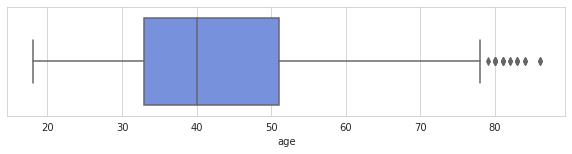

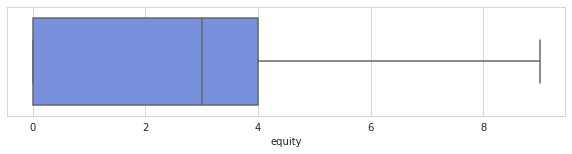

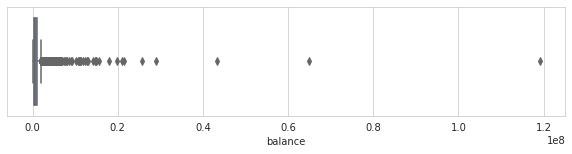

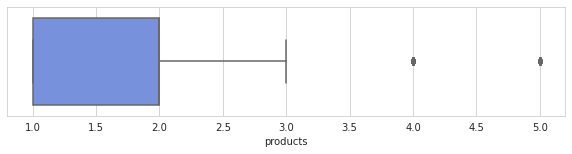

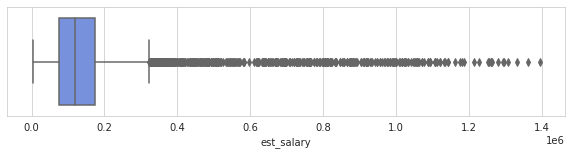

In [26]:
#строим диаграмму размаха и определим выбросы в столбцах с возрастом, балансом на счёте и ЗП
for column in ['age', 'equity', 'balance', 'products', 'est_salary']:
    plt.figure(figsize=(10,2))
    sns.boxplot(x=column, data=df)
    plt.show()

In [27]:
# посчитаем строки с клиентами, заработная плата которых очень низка
df[df['est_salary']<10000]['userid'].count()

19

Клиентов с такой оценочной зарплатой не так много, так что, скорее всего, это не сбой, а особенности оценки дохода.

In [28]:
# посчитаем строки с клиентами, баланс которых больше 15 млн.
df[df['balance']>15000000]['userid'].count()

11

In [29]:
# отобразим их
df[df['balance']>15000000]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,female,male,balance_na
125,227092,1000,Ярославль,М,32,5,1.975718e+07,2,1,1,1024626.50,0,0,0,1,0,1,0
1059,114103,894,Ярославль,М,58,4,6.486621e+07,2,1,1,88861.60,1,0,0,1,0,1,0
1846,114088,927,Ярославль,М,57,5,4.327710e+07,3,0,1,82619.00,0,0,0,1,0,1,0
4005,163640,912,Ярославль,М,35,4,1.562410e+07,2,0,1,1395064.45,0,0,0,1,0,1,0
4721,228786,1000,Ярославль,М,45,5,2.900893e+07,2,0,1,811804.54,0,0,0,1,0,1,0
6318,163663,970,Ярославль,М,35,3,1.500450e+07,2,0,1,991012.77,1,0,0,1,0,1,0
6948,137434,1000,Ярославль,М,37,4,2.090616e+07,2,1,1,947606.60,1,0,0,1,0,1,0
7109,203824,986,Ярославль,М,34,5,1.790476e+07,2,1,1,856500.86,1,0,0,1,0,1,0
7597,156149,900,Ярославль,М,62,5,1.191136e+08,2,1,1,138041.31,0,0,0,1,0,1,0
8484,221720,1000,Ярославль,Ж,35,5,2.154994e+07,2,0,0,1051902.65,0,0,0,1,1,0,0


Клиенты с большим балансом на счету имеют высокую зарплату, много баллов собственности, что соответсвует портрету состоятельного клиента банка.

In [30]:
df.age.min()

18

Минимальный возраст клиентов банка соответствует логике и законодательству.

### Промежуточный вывод

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9999 non-null   int64  
 1   score          9999 non-null   int64  
 2   city           9999 non-null   object 
 3   gender         9999 non-null   object 
 4   age            9999 non-null   int64  
 5   equity         9999 non-null   int64  
 6   balance        7705 non-null   float64
 7   products       9999 non-null   int64  
 8   credit_card    9999 non-null   int64  
 9   last_activity  9999 non-null   int64  
 10  est_salary     9999 non-null   float64
 11  churn          9999 non-null   int64  
 12  rostov         9999 non-null   uint8  
 13  rybinsk        9999 non-null   uint8  
 14  yaroslavl      9999 non-null   uint8  
 15  female         9999 non-null   uint8  
 16  male           9999 non-null   uint8  
 17  balance_na     9999 non-null   int64  
dtypes: float

В результате предобработки удалось разобраться с пропусками, исправить типы данных, понять природу дубликатов, проанализировать возможные выбросы, закодировать данные.

## Исследовательский анализ данных

**Основная цель данного анализа: сравнить распределения признаков отточных клиентов, долей оттока, корреляции.**

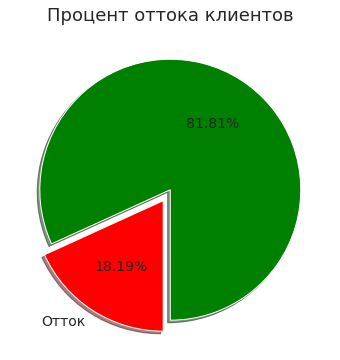

In [32]:
# визуализируем процент оттока

sizes = df['churn'].value_counts(sort = True)
colors = ["Green", "Red"] 
labels = '', 'Отток'
explode = (0, 0.1)
rcParams['figure.figsize'] = 6,6

plt.pie(sizes, explode=explode, colors=colors, labels=labels,
        autopct='%1.2f%%', shadow=True, startangle=270, textprops={'fontsize': 14})
plt.title('Процент оттока клиентов', fontdict = {'fontsize' : 18})
plt.show()

Процент оттока, действительно, велик, и, пока он не дошёл до четверти клиентов, необходимо принять меры и найти способ удержать клиентов.

In [33]:
# рассмотрим центральные тенденции характеристик в разрезе оттока
df_churn = df.groupby('churn').agg({
                         'churn': 'count',
                         'equity': 'mean',
                         'products': 'mean', 
                         'credit_card': 'mean', 
                         'last_activity': 'mean', 
                         'female': 'mean', 
                         'male': 'mean', 
                         'score' : 'median', 
                         'age': 'median', 
                         'balance': 'median',
                         'est_salary': 'median',                         
                         'rostov': 'mean', 
                         'rybinsk': 'mean', 
                         'yaroslavl': 'mean', 
                         'balance_na': 'mean'}).rename(columns = {'churn':'count'})
pd.concat({
    'Не отточные': df_churn.iloc[0],
    'Отточные': df_churn.iloc[1],
    'Разница %': (df_churn.iloc[1]/df_churn.iloc[0]-1)*100},
    axis=1).sort_values('Разница %', ascending=False)

,Не отточные,Отточные,Разница %
balance,475382.445000,782410.470000,64.585478
equity,2.374817,3.764156,58.503022
last_activity,0.483741,0.702584,45.239722
male,0.467237,0.650357,39.192125
products,1.757579,2.377130,35.250232
est_salary,118257.715000,125395.220000,6.035551
yaroslavl,0.583252,0.614074,5.284481
rostov,0.140709,0.146234,3.926647
score,848.000000,866.000000,2.122642
age,40.000000,39.000000,-2.500000


Медианный баланс, зарплата и кредитный рейтинг отточных клиентов выше, а баллов собственности в среднем больше, выше и доля жителей из крупных городов, мужчин и активных за последние 3 месяца пользователей; меньше доля владельцев женщин, кредитных карт. Хотя отточных клиентов примерно в 4 раза меньше.

### Распределения признаков

Построим распределения признаков в разрезе отточности, чтобы понять, какие параметры могут быть характерными для отточных клиентов.

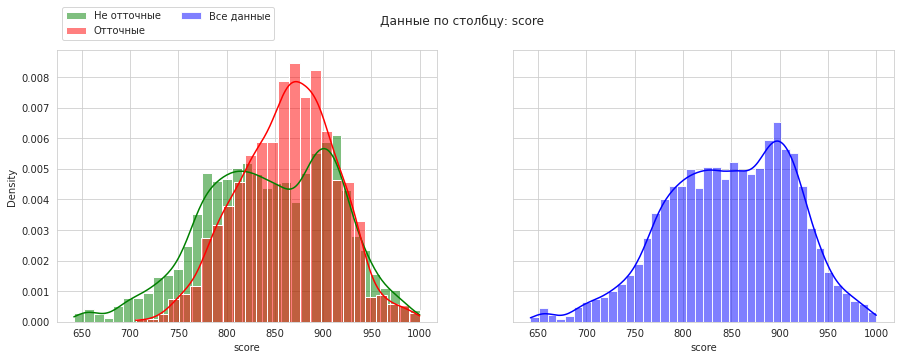

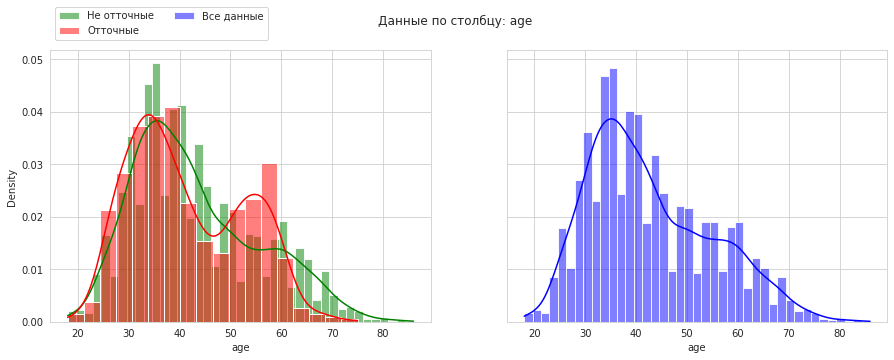

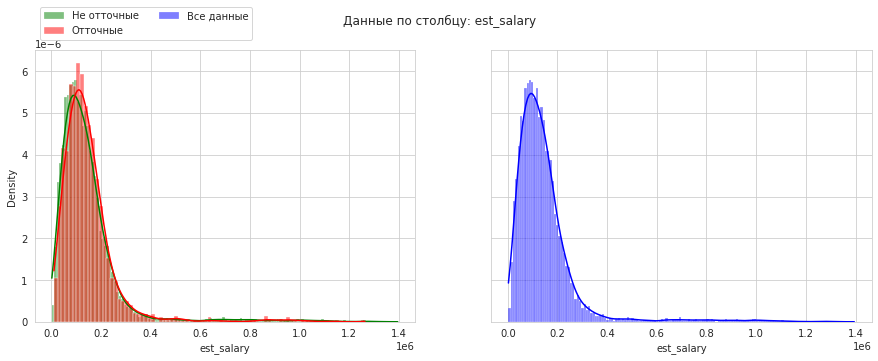

In [34]:
columns = ['score', 'age', 'est_salary']
for col in columns:
    x1 = df[df['churn']==0][col]
    x2 = df[df['churn']==1][col]
    x3 = df[col]
# рисуем графики
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)
    fig.suptitle('Данные по столбцу: ' + col)
    sns.histplot(x1, kde=True, color="Green", ax=axes[0], stat='density', common_norm=False, label='Не отточные', alpha=0.5)
    sns.histplot(x2, kde=True, color="Red", ax=axes[0], stat='density', common_norm=False, label='Отточные', alpha=0.5)
    sns.histplot(x3, kde=True, color="Blue", ax=axes[1], stat='density', common_norm=False, label='Все данные', alpha=0.5)
    fig.legend(bbox_to_anchor=(0.125, 0.895), loc='lower left', ncol=2, borderaxespad=0.5)
    plt.show()

По скору в интервале от 820 до 950 баллов преобладают отточчные клиенты, а не отточные немного проседают в районе 870 баллов, относительно правого и левого пиков.

По возрасту наблюдаются 2 пика и каждой из групп. Первый (30-40 лет) примерно схож, а, вот, второй у не отточных клиентов более плавный и сдвинут к 60-62 годам, а у отточных очень отчётливо виднеется в интервале от 50 до 60 лет. Это может быть связано с выбором продуктов банка, удобных для пенсионеров.

Относительно зарплат, распределение отточных клиентов  немного сдвинуто правее, захватывая интервал от 100 тысяч. Зелёный хвост графика не отточных клиентов ещё проглядывается в зарплатах от 1.3 миллионов и в районе 500 тысяч.

Общие распределения в большей степени повторяют распределения не отточных клиентов.

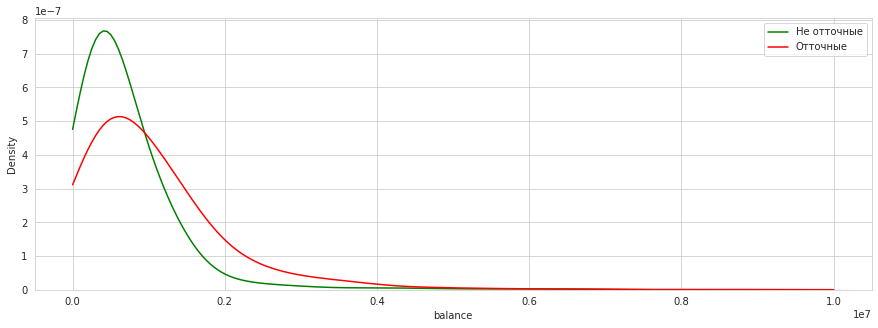

In [35]:
# визуализируем взаимосвязь 'churn' - 'balance'
plt.figure(figsize=(15,5))
sns.kdeplot(df[df['churn'] == 0]['balance'], clip=(0.0, 10000000.0), color='green')
sns.kdeplot(df[df['churn'] == 1]['balance'], clip=(0.0, 10000000.0), color='red')
plt.legend(['Не отточные', 'Отточные'])
plt.show()

Более пологий график по балансу на большем интервале высоких сумм (начиная примерно с 1 миллиона) показывает преобладание доли отточных клиентов.

Уровень отточности по банку: 18.19 %


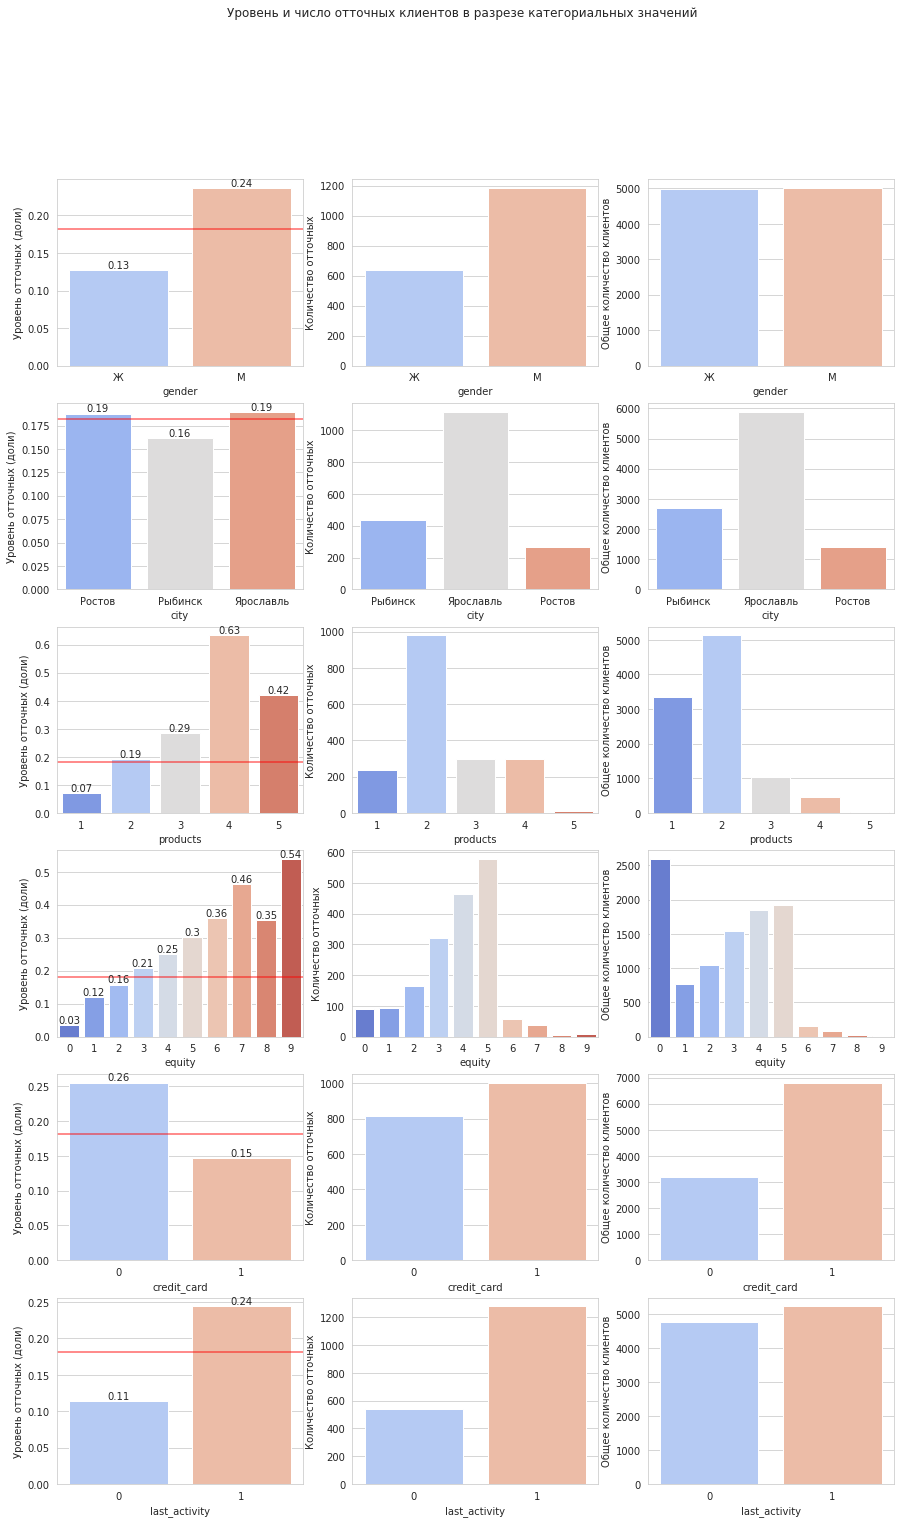

In [36]:
dfnew = df.copy()

churn_mean=dfnew['churn'].mean() # уровень отточности по банку
print('Уровень отточности по банку:', round(churn_mean*100, 2), '%')
fig, axes = plt.subplots(6,3, figsize=(15, 24))
n=0
fig.suptitle("Уровень и число отточных клиентов в разрезе категориальных значений")
for categorical in ['gender', 'city', 'products', 'equity', 'credit_card', 'last_activity']:
    
    # выводим уровень отточности клиентов в категории
    levels=dfnew.groupby(categorical).agg({'churn': 'mean'}).reset_index()
    sns.barplot(data=levels, x=categorical, y='churn', ax=axes[n][0], palette="coolwarm")
    axes[n][0].axhline(y=churn_mean, color='red', alpha=0.6)
    axes[n][0].set_ylabel("Уровень отточных (доли)")
    
    # выводим метки на график
    labels=levels['churn'].values.round(2)
    rects=axes[n][0].containers[0].patches
    for rect, label in zip(rects, labels):
        axes[n][0].text(rect.get_x() + rect.get_width()/2, rect.get_height(), label, ha="center", va="bottom")
    
    # выводим количество отточных клиентов в категории
    sns.countplot(data=dfnew[dfnew['churn'] == 1], x=categorical, palette="coolwarm", ax=axes[n][1])
    axes[n][1].set_ylabel("Количество отточных")

    # выводим общее количество всех клиентов в категории
    sns.countplot(data=dfnew, x=categorical, palette="coolwarm", ax=axes[n][2])
    axes[n][2].set_ylabel("Общее количество клиентов")

    n+=1
plt.show()

Совокупные данные по полу сбалансированы, а в разрезе оттока доля мужчин больше (почти четверть мужчин в оттоке). Отточных женщин примерно в 2 раза меньше. чем отточных мужчин.

В общих данных клиентов из ярославского филиала заметно больше, а доля оттока по ним меньше, чем в Рыбинске и Ростове.

В разрезе продуктов банка более 50% клиентов, у которых 4 продукта, являются отточными. Очень плохой показатель. Владельцы 5 продуктов от них не сильно отстают. Возможно, некоторые продукты плохо сочетаются между собой.

Уровень отточных клиентов более 50% среди обладателей 9 баллов собственности. Чем меньше собственности, тем меньше доля оттока. В абсолютном выражении больше всего отточных клиентов среди обладателей 5 баллов собственности.

Несмотря на преобладание владельцев кредитных карт, доля оттока по ним меньше. 

Активные же клиенты преобладают и по численности и по доле оттока. Возможно, часть их активности и связана с подготовкой к уходу из банка.

Глядя на распределения клиентов можно выделить некоторые характеристики, по которым можно будет сегментировать клиентов. Дальше признаки могут немного корректироваться.

`Скор в рамках 840-950, возраст в интервалах 25-35 лет и 50-60 лет, зарплата - 150-230 тысяч, баланс больше 1 миллиона, мужчины, возможно, жители крупных городов, клиенты без кредитных карт, активные клиенты в последние 3 месяца, имеющие больше 2 продуктов банка и больше 2 баллов собственности.`

### Корреляционный анализ

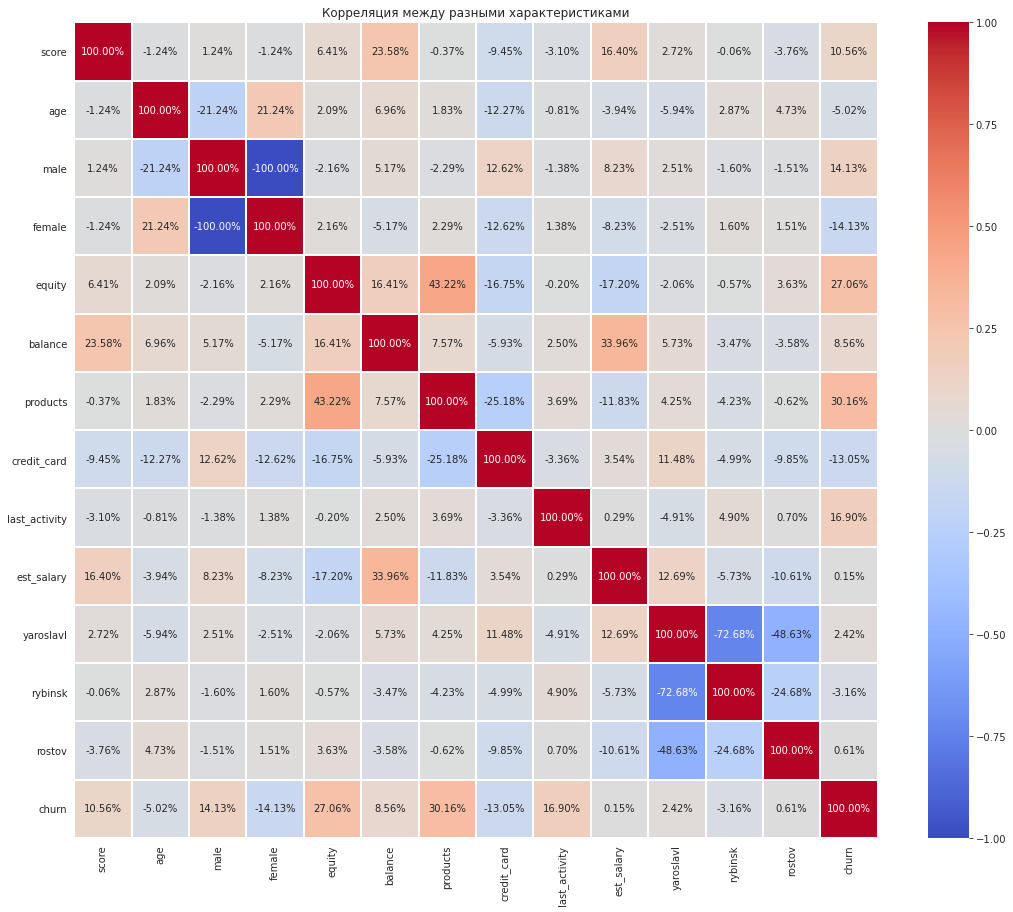

In [37]:
colum = df[
    ['score', 'age', 'male', 'female', 'equity', 'balance', 'products', 'credit_card', \
     'last_activity', 'est_salary', 'yaroslavl', 'rybinsk', 'rostov', 'churn']]
plt.figure(figsize=(18,15))
sns.heatmap(colum.corr(), cmap='coolwarm', center=0, annot=True, fmt=".2%", linewidths=1)
plt.title('Корреляция между разными характеристиками')
plt.show()

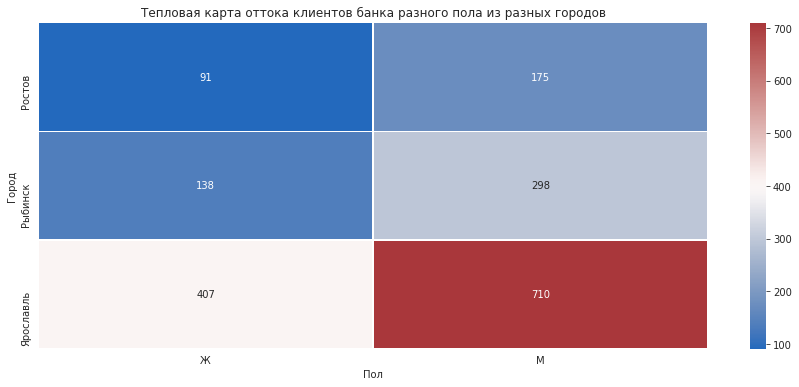

In [38]:
city_corr = df.pivot_table(
    index='city', 
    columns='gender', 
    values='churn', 
    aggfunc='sum'
)
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.heatmap(city_corr,linewidths= .2, cmap='vlag', annot=True,fmt='.0f')
ax.set(
    title='Тепловая карта оттока клиентов банка разного пола из разных городов', 
    ylabel='Город', 
    xlabel='Пол'
)
plt.show()

Отток мужчин из Ярославля сильно превышает другие категории. Ярославль в принципе превосходит другие города по абсолютному оттоку. На втором месте Рыбинск, где такая же ситуация с оттоком по полу и на третьем месте Ростов.

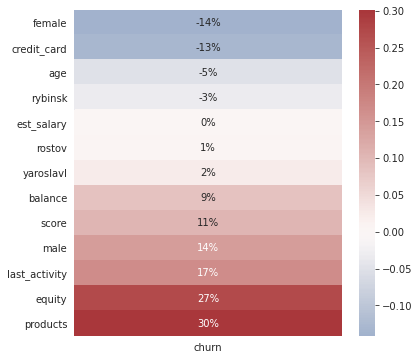

In [39]:
sns.heatmap(
    colum.corr().loc[:,['churn']].drop(
        'churn').sort_values('churn'), annot=True,fmt='.0%', cmap='vlag', center=0)
plt.show()

На более наглядной тепловой карте видно, что наибольшая корреляция оттока связана с продуктами банка и баллами собственности. Необходимо обратить внимание на активных клиентов, мужчин и тех, кто по какой-либо причине ещё не имеет кредитной карты.

По шкале Чеддока корреляци оттока с числом продуктов умеренная (30%), а остальные корреляции имеют слабый характер: 27% с баллами собственности, 17% с активностью, 14% с мужским полом, отрицательную корреляцию в 14% с женским полом, в 13% с наличием кредитных карт, положительную корреляцию в 9% с балансом, отрицательную в 5% с возрастом, в 3% с клиентами из Рыбинска, положительную корреляцию в 2 и 1 % с клиентами из Ярославля и Ростова.



## Составление и проверка гипотез

### Гипотеза 1

**Проверка гипотезы о различии дохода между ушедшими и оставшимися клиентами.**

H0: доходы оставшихся и отточных клиентов равны

H1: доходы оставшихся и отточных клиентов не равны

T-тест, является одним из наиболее широко используемых и эффективных методов для сравнения средних значений. При его применении важно проверять условия, при которых ему можно доверять:

- нормальность распределения средних,

- соответствие распределения ошибок хи-квадрат-распределению,

- независимость случайных величин,

- иметь достаточно большой размер выборки для обеспечения статистической мощности теста.

U-критерий Манна-Уитни (иногда называемый критерием суммы рангов Уилкоксона) используется для сравнения различий между двумя независимыми выборками, когда распределение выборки не является нормальным, а размеры выборки малы (n < 30).

Он считается непараметрическим эквивалентом двухвыборочного независимого t-критерия .

In [40]:
# проведем u-test

alpha = .05 # критический уровень статистической значимости

a = df[df['churn'] == 1]['est_salary']
b = df[df['churn'] == 0]['est_salary']

print('Средние доходы ушедших клиентов: ', a.mean().round(2))
print('Средние доходы оставшихся клиентов: ', b.mean().round(2))

results = st.mannwhitneyu(a, b)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 

Средние доходы ушедших клиентов:  148310.73
Средние доходы оставшихся клиентов:  147783.2
p-значение:  0.00021160652203623057
Отвергаем нулевую гипотезу


Имеет место наличие статистически значимых различий между средними доходами клиентов, желающих уйти, и средним средними доходами клиентов, желающих остаться.

In [41]:
# проведем t-test
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(a, b, equal_var = False)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.8724727072323815
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу о том, что доходы оставшихся и отточных клиентов равны. С большой долей вероятности средние доходы оставшихся и отточных клиентов равны не имеют статистически значимых отличий.

Мы получили разные результаты по двум тестам. Проверим, что могло стать причиной этому.

In [42]:
# проведём тест на соотвествие данных о доходах отточных клиентов нормальному распределеню

alpha = .05  # критический уровень статистической значимости

shapiro_test_stat, p_value = st.shapiro(a)

print('p-значение: ', p_value)
if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Нормальное распределение')  

p-значение:  0.0
Распределение не нормально


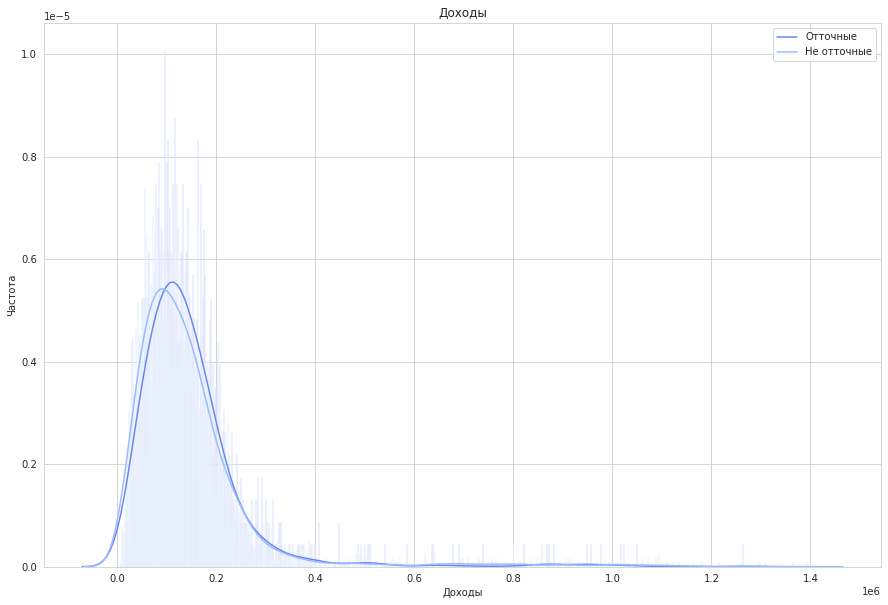

In [43]:
plt.figure(figsize=(15, 10))  
sns.distplot(a,bins=1000)
sns.distplot(b,bins=1000)
plt.legend(['Отточные', 'Не отточные'])
plt.title('Доходы')
plt.xlabel("Доходы") 
plt.ylabel("Частота")
plt.show()

Распределение обладает длинным хвостом, что не выглядит нормально, поэтому лучше довериться U-тесту и отвергнуть гипотезу.

### Гипотеза 2

**Проверка гипотезы о различии возраста между ушедшими и оставшимися клиентами.**

H0: возраст оставшихся и отточных клиентов одинаковый

H1: возраст оставшихся и отточных клиентов разный

In [44]:
alpha = .05 # критический уровень статистической значимости

c = df[df['churn'] == 1]['age']
d = df[df['churn'] == 0]['age']

print('Средний возраст ушедших клиентов: ', c.mean().round(2))
print('Средний возраст оставшихся клиентов: ', d.mean().round(2))

results = st.ttest_ind(c, d, equal_var = False)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний возраст ушедших клиентов:  41.43
Средний возраст оставшихся клиентов:  43.01
p-значение:  8.5482374759468e-08
Отвергаем нулевую гипотезу


In [45]:
# проведем u-test

alpha = .05 # критический уровень статистической значимости

c = df[df['churn'] == 1]['age']
d = df[df['churn'] == 0]['age']

results = st.mannwhitneyu(c, d)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 

p-значение:  3.813328889714715e-06
Отвергаем нулевую гипотезу


Имеет место наличие статистически значимых различий между средним возрастом клиентов, желающих уйти, и средним возрастом клиентов, желающих остаться.

### Гипотеза 3

**Проверка гипотезы о различии среднего количества продуктов банка между ушедшими и оставшимися клиентами.**

H0: среднего количества продуктов банка оставшихся и отточных клиентов одинаковое

H1: среднего количества продуктов банка оставшихся и отточных клиентов разное

In [46]:
alpha = .05 # критический уровень статистической значимости

e = df[df['churn'] == 1]['products']
f = df[df['churn'] == 0]['products']

print('Среднее количество продуктов банка ушедших клиентов: ', e.mean().round(2))
print('Среднее количество продуктов банка оставшихся клиентов: ', f.mean().round(2))

results = st.ttest_ind(e, f, equal_var = False)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Среднее количество продуктов банка ушедших клиентов:  2.38
Среднее количество продуктов банка оставшихся клиентов:  1.76
p-значение:  3.241238337429691e-139
Отвергаем нулевую гипотезу


In [47]:
# проведем u-test

alpha = .05 # критический уровень статистической значимости

e = df[df['churn'] == 1]['products']
f = df[df['churn'] == 0]['products']

results = st.mannwhitneyu(e, f)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 

p-значение:  1.7296310495167595e-162
Отвергаем нулевую гипотезу


Имеет место наличие статистически значимых различий между средним количество продуктов банка клиентов, желающих уйти, и средним количество продуктов банка клиентов, желающих остаться.

## Сегментация отточных клиентов

In [48]:
# список условий на основе признаков отточности, корректирую которые, можно найти отточные сегменты
c=[ '',
    'male == 1',
    'equity > 3',
    'credit_card == 0',
    'last_activity == 1',
    '140000 <= est_salary <= 220000',
    '25 <= age <= 35',
    '50 < age < 59',
    '820 <= score <= 900',
    'balance > 990000'
]

In [49]:
churn_rate = df['churn'].mean()
print('Уровень отточности по банку:', round(churn_rate*100, 2), '%')

# соединяем условия в сегмент
def query_concat(a,op=' and '):
    q='' # условие
    for i in a:
        if i != '':
            q = i if q == '' else q + op + i
    return q

# соединяем сегменты в одну выборку
def query_concat_2(a):
    q='' # наборы условий
    for i in a:
        if i != '':
            q = '(' + i if q == '' else q + ') or (' + i
    return q + ')'

# вычисление отточности сегмента и проверка размера
def query_churn_mean(q):
    if q == '': # сегмент (совокупность условий)
        return 0
    cm = df.query(q).agg({"churn":['mean','count']}).values
    if cm[1] < 500:
        # маленький сегмент
        return 0
    if cm[1] > 5000:
        # большой сегмент
        return 0
    else:
        return round(cm[0][0],2)

best_k=0 # переменная максимизации churn rate
best_q='' # лучший набор условий
i=0 # счётчик итераций

# формирование наборов условий
for x in list(itertools.permutations([0,1,2,3], 3)):
    for y in list(itertools.permutations([0,4,5,6], 3)):
        for z in list(itertools.permutations([0,7,8,9], 3)):
            i+=1
            if i > 1000:
                break
            #print(x[0],y[0],z[0],' | ',x[1],y[1],z[1],' | ',x[2],y[2],z[2])
            segment_1=query_concat([c[x[0]],c[y[0]],c[z[0]]])
            segment_2=query_concat([c[x[1]],c[y[1]],c[z[1]]])
            segment_3=query_concat([c[x[2]],c[y[2]],c[z[2]]])
            #print(q1,'|',q2,'|',q3)
            q1_k=query_churn_mean(segment_1)
            q2_k=query_churn_mean(segment_2)
            q3_k=query_churn_mean(segment_3)
            # print(q1_k, q2_k, q3_k, 2*gauge_churn)
            # проверяем условие по отточности сегментов
            if (q1_k > 2*churn_rate) and (q2_k > 2*churn_rate) and (q3_k > 2*churn_rate):
                q = query_concat_2([segment_1,segment_2,segment_3]) # выборка из 3 сегментов
                # print(q)
                t_k=query_churn_mean(q)
                if t_k > best_k:
                    best_q = q
                    best_k = t_k # лучшая отточность выборки
                    print('Найден более отточный набор! Churn mean:',best_k,'(',q1_k,q2_k,q3_k,');',
                          'Churn count: ',df.query(best_q)['churn'].sum(),';')
                    print('Всего клиентов во всех сегментах:', df.query(best_q)['userid'].count())
                    print('Сегменты:\n', best_q.replace(" or ", "\n "),'\n')
                    
                    
print('Завершение за итераций:',i)

Уровень отточности по банку: 18.19 %
Найден более отточный набор! Churn mean: 0.42 ( 0.47 0.45 0.4 ); Churn count:  811 ;
Всего клиентов во всех сегментах: 1930
Сегменты:
 (140000 <= est_salary <= 220000 and balance > 990000)
 (male == 1 and last_activity == 1 and 820 <= score <= 900)
 (equity > 3 and 50 < age < 59) 

Завершение за итераций: 1535


**Поближе посмотрим на найденные сегменты**

In [50]:
me = ['mean','count', 'sum'] # методы

In [51]:
s1 = df.query('140000 <= est_salary <= 220000 and balance > 990000') # сегмент 1
display(s1.head())
display(s1.describe())
display(s1.agg({'churn': me, 'rostov' : me, 'rybinsk' : me, 'yaroslavl' : me, 'female' : me, 'male' : me}))

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,female,male,balance_na
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0,0
8,211686,923,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0,0,0,1,0,1,0
15,120260,731,Рыбинск,М,42,3,1480548.47,3,1,0,160974.43,0,0,1,0,0,1,0
20,114192,772,Ростов,М,43,3,1315511.65,2,0,0,143935.71,0,1,0,0,0,1,0
63,140749,948,Ярославль,Ж,34,5,3134788.66,2,0,0,199705.32,0,0,0,1,1,0,0


,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,female,male,balance_na
count,628.000000,628.000000,628.000000,628.000000,6.280000e+02,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.0
mean,170200.350318,880.340764,43.100318,4.160828,1.676469e+06,2.361465,0.504777,0.511146,174173.074411,0.474522,0.133758,0.246815,0.619427,0.421975,0.578025,0.0
std,35745.478207,47.804110,9.359613,1.079574,1.178167e+06,0.864825,0.500376,0.500274,22924.687880,0.499749,0.340663,0.431502,0.485915,0.494268,0.494268,0.0
min,96562.000000,731.000000,23.000000,0.000000,9.906813e+05,1.000000,0.000000,0.000000,140292.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,140730.500000,852.000000,36.000000,3.750000,1.192126e+06,2.000000,0.000000,0.000000,153092.825000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,171870.000000,889.000000,42.000000,4.000000,1.390330e+06,2.000000,1.000000,1.000000,171238.270000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0
75%,200235.000000,917.000000,49.000000,5.000000,1.874478e+06,3.000000,1.000000,1.000000,192697.235000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0
max,229058.000000,989.000000,77.000000,9.000000,2.572776e+07,5.000000,1.000000,1.000000,219976.580000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


,churn,rostov,rybinsk,yaroslavl,female,male
mean,0.474522,0.133758,0.246815,0.619427,0.421975,0.578025
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
sum,298.000000,84.000000,155.000000,389.000000,265.000000,363.000000


**Портрет клиента из сегмента 1**

- Средний возраст: 43 года
- Много баллов собственности
- В основном, 1-2 миллиона на балансе
- Зарплата: от 140 до 220 тысяч рублей
- Среднее число банковских продуктов

In [52]:
s2 = df.query('male == 1 and last_activity == 1 and 820 <= score <= 900') # сегмент 2
display(s2.head())
display(s2.describe())
display(s2.agg({'churn': me, 'rostov' : me, 'rybinsk' : me, 'yaroslavl' : me, 'female' : me, 'male' : me}))

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,female,male,balance_na
16,123335,829,Ярославль,М,45,5,507842.84,1,1,1,169330.64,0,0,0,1,0,1,0
35,221927,863,Ростов,М,39,5,1461423.33,1,0,1,221699.52,0,1,0,0,0,1,0
36,199614,822,Ярославль,М,60,5,1472483.77,1,1,1,89132.67,0,0,0,1,0,1,0
45,118849,826,Ярославль,М,31,4,333330.99,1,1,1,46981.53,0,0,0,1,0,1,0
58,164676,860,Ярославль,М,37,5,648594.03,2,1,1,213586.86,1,0,0,1,0,1,0


,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,female,male,balance_na
count,993.000000,993.000000,993.000000,993.000000,8.200000e+02,993.000000,993.000000,993.0,993.000000,993.000000,993.000000,993.000000,993.000000,993.0,993.0,993.000000
mean,173817.054381,862.175227,39.593152,3.240685,1.052080e+06,2.109768,0.645519,1.0,136459.139637,0.452165,0.139980,0.316213,0.543807,0.0,1.0,0.174220
std,34753.909459,24.785318,10.982466,1.943630,4.775335e+06,1.007550,0.478597,0.0,91732.439254,0.497957,0.347141,0.465232,0.498328,0.0,0.0,0.379489
min,95384.000000,820.000000,18.000000,0.000000,8.155480e+03,1.000000,0.000000,1.0,12945.280000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000
25%,144673.000000,839.000000,31.000000,2.000000,3.571692e+05,1.000000,0.000000,1.0,76435.240000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000
50%,172959.000000,863.000000,37.000000,4.000000,6.270816e+05,2.000000,1.000000,1.0,122432.220000,0.000000,0.000000,0.000000,1.000000,0.0,1.0,0.000000
75%,206352.000000,885.000000,47.000000,5.000000,1.098804e+06,2.000000,1.000000,1.0,174958.500000,1.000000,0.000000,1.000000,1.000000,0.0,1.0,0.000000
max,229058.000000,900.000000,69.000000,9.000000,1.191136e+08,5.000000,1.000000,1.0,874267.010000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,1.000000


,churn,rostov,rybinsk,yaroslavl,female,male
mean,0.452165,0.13998,0.316213,0.543807,0.0,1.0
count,993.000000,993.00000,993.000000,993.000000,993.0,993.0
sum,449.000000,139.00000,314.000000,540.000000,0.0,993.0


**Портрет клиента из сегмента 2**

- Мужчины, проявляющие банковскую активность за последние 3 месяца
- Средний возраст: 39 лет
- Средняя рыночная зарплата
- Высокий кредитный рейтинг
- Мало банковских продуктов

In [53]:
s3 = df.query('equity > 3 and 50 < age < 59') # сегмент 3
display(s3.head())
display(s3.describe())
display(s3.agg({'churn': me, 'rostov' : me, 'rybinsk' : me, 'yaroslavl' : me, 'female' : me, 'male' : me}))

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,female,male,balance_na
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0,0
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0,0,1,0,0,1,0
8,211686,923,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0,0,0,1,0,1,0
22,161656,871,Ярославль,М,51,4,708866.92,1,1,0,106407.26,0,0,0,1,0,1,0
56,188364,860,Ярославль,М,55,6,865702.41,2,1,0,76058.00,0,0,0,1,0,1,0


,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,female,male,balance_na
count,535.000000,535.000000,535.000000,535.000000,5.350000e+02,535.000000,535.000000,535.000000,5.350000e+02,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.0
mean,177085.700935,859.469159,54.654206,4.665421,1.414582e+06,2.216822,0.538318,0.530841,1.305260e+05,0.400000,0.147664,0.314019,0.538318,0.521495,0.478505,0.0
std,33777.722158,51.380151,2.357166,0.733253,3.456302e+06,0.794231,0.498996,0.499515,1.275169e+05,0.490356,0.355098,0.464558,0.498996,0.500005,0.500005,0.0
min,99726.000000,737.000000,51.000000,4.000000,1.877022e+05,1.000000,0.000000,0.000000,7.571800e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,149268.000000,821.500000,53.000000,4.000000,5.981068e+05,2.000000,0.000000,0.000000,7.041813e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,179616.000000,861.000000,55.000000,5.000000,9.195902e+05,2.000000,1.000000,1.000000,1.036109e+05,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0
75%,206078.500000,897.000000,57.000000,5.000000,1.421498e+06,3.000000,1.000000,1.000000,1.484235e+05,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0
max,229058.000000,990.000000,58.000000,9.000000,6.486621e+07,5.000000,1.000000,1.000000,1.185540e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


,churn,rostov,rybinsk,yaroslavl,female,male
mean,0.4,0.147664,0.314019,0.538318,0.521495,0.478505
count,535.0,535.000000,535.000000,535.000000,535.000000,535.000000
sum,214.0,79.000000,168.000000,288.000000,279.000000,256.000000


**Портрет клиента из сегмента 3**

- Средний возраст: 54 года
- Много баллов собственности
- Мало банковских продуктов

Важно отметить, что отдел маректинга включает только двух работников, у них нет автоматизированных систем, поэтому все мероприятия, рассылки и агитации будут выполнены ручным трудом. Поэтому важно приоритизировать сегменты, чтобы маркетинг знал, на что обратить внимание в первую очередь в случае, если ресурсов маркетинга не хватит на охват всех выделенных сегментов.

## Общий вывод

Файл с данными и все необходимые библиотеки были успешно загружены; отображена основная информация по таблице.

Пропущенные значения баланса преобладают у клиентов не изъявивших желание покинуть банк, имеющих кредитные карты, пользующихся меньшим числом продуктов банка. Сложно однозначно определить причину таких пропусков.

При проверке дубликатов выянилось, что, вероятно, в связи со способом сбора данных, филиалы банков могли использовать собственные идентификаторы для клиентов, из-за чего возникли дубликаты.

Клиентов с такой оценочной зарплатой не так много, так что, скорее всего, это не сбой, а особенности оценки дохода. Клиенты с большим балансом на счету имеют высокую зарплату, много баллов собственности, что соответсвует портрету состоятельного клиента банка. Минимальный возраст клиентов банка соответствует логике и законодательству.

В результате предобработки удалось разобраться с пропусками, исправить типы данных, понять природу дубликатов, проанализировать возможные выбросы, закодировать данные.

Медианный баланс, зарплата и кредитный рейтинг отточных клиентов выше, а баллов собственности в среднем больше, выше и доля жителей из крупных городов, мужчин и активных за последние 3 месяца пользователей; меньше доля владельцев женщин, кредитных карт. Хотя отточных клиентов примерно в 4 раза меньше.

*По скору в интервале от 820 до 950 баллов преобладают отточчные клиенты, а не отточные немного проседают в районе 870 баллов, относительно правого и левого пиков.*

*По возрасту наблюдаются 2 пика и каждой из групп. Первый (30-40 лет) примерно схож, а, вот, второй у не отточных клиентов более плавный и сдвинут к 60-62 годам, а у отточных очень отчётливо виднеется в интервале от 50 до 60 лет. Это может быть связано с выбором продуктов банка, удобных для пенсионеров.*

*Относительно зарплат, распределение отточных клиентов немного сдвинуто правее, захватывая интервал от 100 тысяч. Зелёный хвост графика не отточных клиентов ещё проглядывается в зарплатах от 1.3 миллионов и в районе 500 тысяч.*

*Более пологий график по балансу на большем интервале высоких сумм (начиная примерно с 1 миллиона) показывает преобладание доли отточных клиентов.*

*Совокупные данные по полу сбалансированы, а в разрезе оттока доля мужчин больше (почти четверть мужчин в оттоке). Отточных женщин примерно в 2 раза меньше. чем отточных мужчин.*

*В общих данных клиентов из ярославского филиала заметно больше, а доля оттока по ним меньше, чем в Рыбинске и Ростове.*

*В разрезе продуктов банка более 50% клиентов, у которых 4 продукта, являются отточными. Очень плохой показатель. Владельцы 5 продуктов от них не сильно отстают. Возможно, некоторые продукты плохо сочетаются между собой.*

*Уровень отточных клиентов более 50% среди обладателей 9 баллов собственности. Чем меньше собственности, тем меньше доля оттока. В абсолютном выражении больше всего отточных клиентов среди обладателей 5 баллов собственности.*

*Несмотря на преобладание владельцев кредитных карт, доля оттока по ним меньше.*

*Активные же клиенты преобладают и по численности и по доле оттока. Возможно, часть их активности и связана с подготовкой к уходу из банка.*

**Скор в рамках 840-950, возраст в интервалах 25-35 лет и 50-60 лет, зарплата - 150-230 тысяч, баланс больше 1 миллиона, мужчины, возможно, жители крупных городов, клиенты без кредитных карт, активные клиенты в последние 3 месяца, имеющие больше 2 продуктов банка и больше 2 баллов собственности.**

Отрицательная корреляция наблюдается между отсутствием информации о балансе и баллами собственности. Возможно, это связано с обнулением баланса при покупке собственности. Также, видна связь отсутствия информации о балансе и числа банковских продуктов, которые тоже могут быть связаны с недвижимостью. Кроме того, средняя связь есть между баллами собственности и банковскими продуктами. 

Статистика возраста схожа в срезах данных с пропусками в балансе и без них, а, вот, баллы собственности сильно разнятся. Это ещё раз подтверждает гипотезу с изменением баланса из-за сделок с собственностью. И продуктов банка в среднем больше в срезе без пропусков. Скорее всего очистка баланса происходит при покупке собственности или с приобретением определённых продуктов банка.

На более наглядной тепловой карте видно, что наибольшая **корреляция оттока** связана с продуктами банка и баллами собственности. Необходимо обратить внимание на активных клиентов, мужчин и тех, кто по какой-либо причине ещё не имеет кредитной карты.

По шкале Чеддока корреляци оттока с числом продуктов умеренная (30%), а остальные корреляции имеют слабый характер: 27% с баллами собственности, 17% с активностью, 14% с мужским полом, отрицательную корреляцию в 14% с женским полом, в 13% с наличием кредитных карт, положительную корреляцию в 9% с балансом, отрицательную в 5% с возрастом, в 3% с клиентами из Рыбинска, положительную корреляцию в 2 и 1 % с клиентами из Ярославля и Ростова.

Имеет место наличие статистически значимых различий между средними доходами клиентов, желающих уйти, и средним средними доходами клиентов, желающих остаться.

Имеет место наличие статистически значимых различий между средним возрастом клиентов, желающих уйти, и средним возрастом клиентов, желающих остаться.

Имеет место наличие статистически значимых различий между средним количество продуктов банка клиентов, желающих уйти, и средним количество продуктов банка клиентов, желающих остаться.

**Портрет клиента из сегмента 1**

- Средний возраст: 43 года
- Много баллов собственности
- В основном, 1-2 миллиона на балансе
- Зарплата: от 140 до 220 тысяч рублей
- Среднее число банковских продуктов

**Портрет клиента из сегмента 2**

- Мужчины, проявляющие банковскую активность за последние 3 месяца
- Средний возраст: 39 лет
- Средняя рыночная зарплата
- Высокий кредитный рейтинг
- Мало банковских продуктов

**Портрет клиента из сегмента 3**

- Средний возраст: 54 года
- Много баллов собственности
- Мало банковских продуктов

## Рекомендации

Общая рекомендация: пересмотреть предложение продуктов и взаимодействие с клиентами. у которых много продуктов банка.

Приоритезируя сегменты, нужно поставить на первое место 2 сегмент (в нём больше всего отточных клиентов) далее обратить внимание на 1 сегмент (наибольшая доля оттока) и в конце разобраться с 3 сегментом.

**Сегмент 1**

Люди с хорошим достатком, уже знакомые с продуктами банка. Следует провести более детальный опрос на предмет того, каких продуктов не хватает банку, устраивает ли качество обслуживания, тарифы, программы. Возможно, этим клиентам не хватает полной информации о продуктах банка.

**Сегмент 2**

Закредитованный средний класс мужчин, пытающийся жить лучше в постоянно меняющихся экономических условиях. Следует предлагать рефинансирование кредитов, рекламировать кэшбек и реферальные ссылки.

**Сегмент 3**

Состоятельные мужчины, интересующиеся собственностью, но не пользующиеся большим числом банковских продуктов. Им следует предложить продукты банка, связанные с собственностью: страховки, кредиты, инвестиции в фонды недвижимости.